In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_analisis = pd.read_excel("df_procesado.xlsx")
df_analisis_cate = pd.read_excel("df_procesado_cate.xlsx")
df_analisis_sinind = df_analisis.drop(["Código NIF"],axis = 1)

In [3]:
df_analisis_sinind.head()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Sectores_Actividades Profesionales y Financieras,Sectores_Comercio,Sectores_Construccion e Inmobilarias,Sectores_Hosteleria,Sectores_Industria,Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA
0,False,False,3252348.0,False,False,False,False,False,False,False,False,0.538763,2,0.964045,0.192971
1,False,False,14448655.0,False,True,False,False,False,False,False,True,0.455249,1,0.972882,0.033079
2,False,False,7184141.0,False,False,True,False,False,False,False,False,0.831133,3,-0.125041,0.128516
3,False,False,835248.0,False,False,True,False,False,False,False,False,0.589296,2,0.248713,0.080703
4,False,False,53343000.0,False,True,False,False,False,False,False,False,0.406089,0,0.061806,0.053240


In [4]:
corr_pearson = df_analisis_sinind.corr(method="pearson")
corr_spearman = df_analisis_sinind.corr(method="spearman")

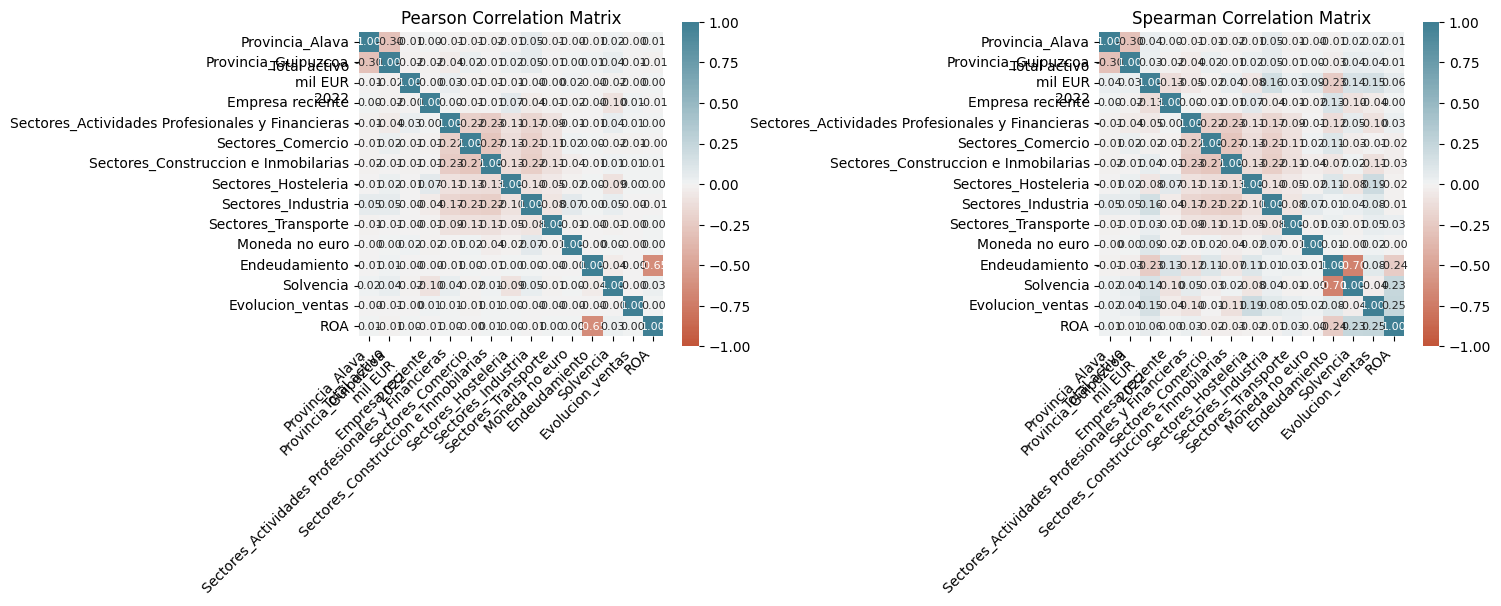

In [5]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_pearson, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax[0], annot=True, fmt=".2f", annot_kws={"size": 8})
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[0].set_title("Pearson Correlation Matrix")

sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True, ax=ax[1], fmt=".2f", annot_kws={"size": 8})
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[1].set_title("Spearman Correlation Matrix");

plt.tight_layout()

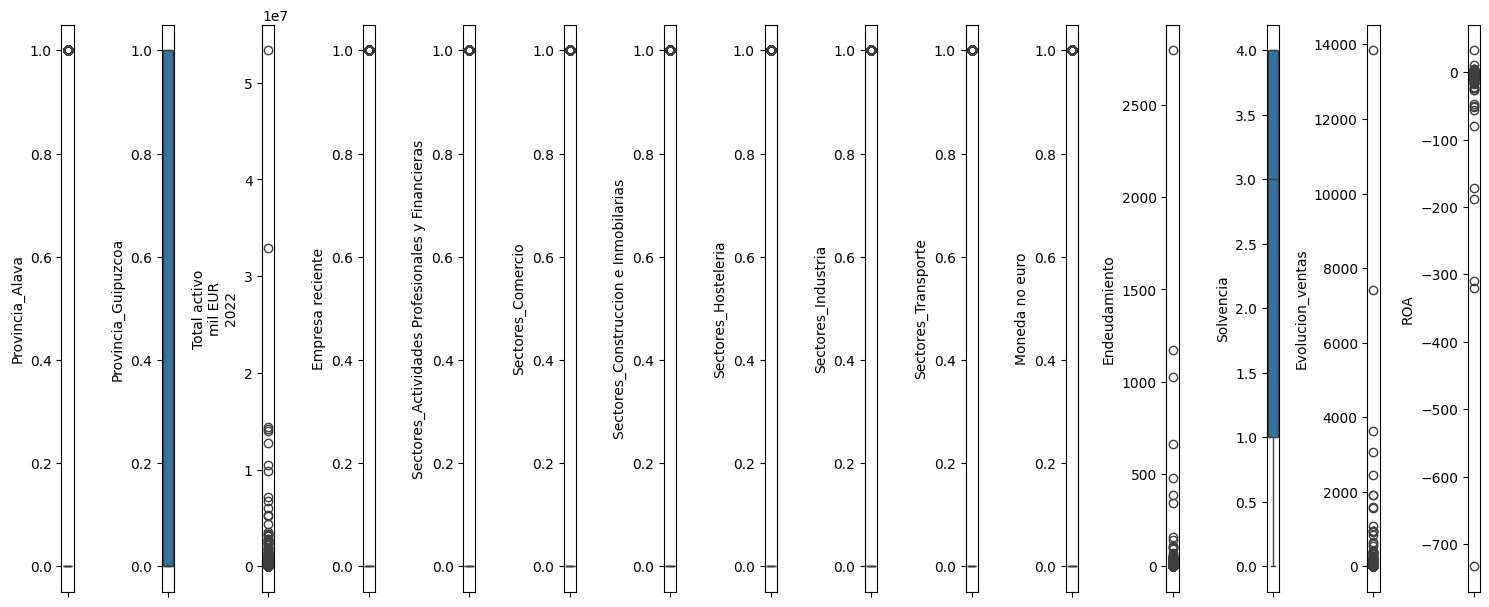

In [6]:
l = df_analisis.drop(["Código NIF"],axis = 1).columns.values
number_of_columns = len(l)
plt.figure(figsize=(number_of_columns,12))
for i in range(0,len(l)):
    plt.subplot(2,number_of_columns,i+1)
    sns.boxplot(df_analisis[l[i]])
    plt.ylabel(l[i])
    plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7f0caec50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7f0caf6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7f5a4f810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7f0cbcbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7f0cbd450>],
 'means': []}

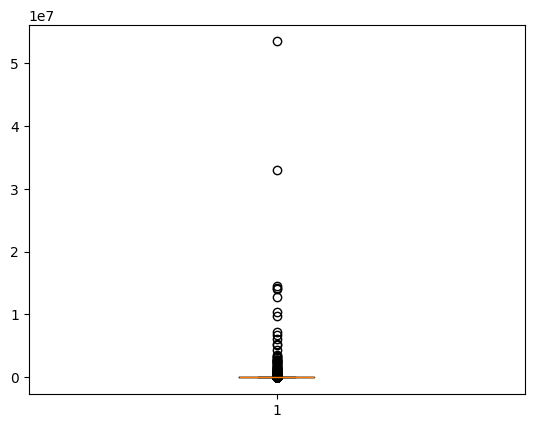

In [7]:
plt.boxplot(df_analisis["Total activo\nmil EUR\n2022"])

In [8]:
df_analisis["Total activo\nmil EUR\n2022"].describe()

count    2.935800e+04
mean     1.365031e+04
std      4.249374e+05
min      2.757000e-02
25%      1.435177e+02
50%      4.328766e+02
75%      1.541833e+03
max      5.334300e+07
Name: Total activo\nmil EUR\n2022, dtype: float64

In [9]:
q1 = np.percentile(df_analisis["Total activo\nmil EUR\n2022"], 25)
q3 = np.percentile(df_analisis["Total activo\nmil EUR\n2022"], 75)
iqr = q3 - q1

limite_outliers = q3 + 1.5 * iqr 
limite_outliers

3639.3049787500004

In [10]:
df_analisis_sinout = df_analisis_cate[df_analisis_cate["Total activo\nmil EUR\n2022"]<limite_outliers]

In [11]:
df_analisis_out = df_analisis_cate[df_analisis_cate["Total activo\nmil EUR\n2022"]>=limite_outliers]

In [12]:
df_analisis_out["Cluster kmeans"] = -1

In [13]:
df_analisis_out.describe()

,Total activo\nmil EUR\n2022,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate,Cluster kmeans
count,4.017000e+03,4017.000000,4017.000000,4017.000000,4017.000000,4017.0
mean,9.565463e+04,3.026886,2.573313,2.831964,2.112771,-1.0
std,1.145507e+06,0.971852,1.396376,1.212236,0.916036,0.0
min,3.640199e+03,0.000000,0.000000,0.000000,0.000000,-1.0
25%,5.410071e+03,2.000000,1.000000,2.000000,2.000000,-1.0
50%,8.865737e+03,3.000000,3.000000,3.000000,2.000000,-1.0
75%,2.098917e+04,4.000000,4.000000,4.000000,3.000000,-1.0
max,5.334300e+07,4.000000,4.000000,4.000000,4.000000,-1.0


In [14]:
df_analisis_sinout.describe()

,Total activo\nmil EUR\n2022,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000
mean,651.164973,2.642279,2.438302,2.641372,2.074543
std,784.300442,1.164088,1.439558,1.217810,1.168148
min,0.027570,0.000000,0.000000,0.000000,0.000000
25%,119.868500,2.000000,1.000000,2.000000,1.000000
50%,325.922250,3.000000,3.000000,3.000000,2.000000
75%,857.121700,4.000000,4.000000,4.000000,3.000000
max,3637.544480,4.000000,4.000000,4.000000,4.000000


In [15]:
df_analisis_out.to_excel('df_outliers.xlsx', index=False)
df_analisis_sinout.to_excel('df_sin_outliers.xlsx', index=False)